In [52]:
 pip install -Uq langgraph langsmith langchain_openai

In [53]:
from os import environ
from google.colab import userdata
environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [54]:
# 상태정의
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    # 메시지 정의
    messages: Annotated[list, add_messages]

In [62]:
# 노드 정의
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-nano", temperature=0)

def chatbot(state: State):
  return State(messages=[llm.invoke(state["messages"])])
  # return {"messages": [llm.invoke(state["messages"])]}

In [56]:
# 그래프 생성
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)

# 노드 추가
graph_builder.add_node("chatbot", chatbot)

# 엣지 추가
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

In [57]:
# 그래프 빌드
graph = graph_builder.compile()

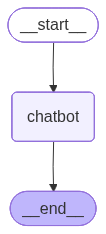

In [58]:
# 그래프 시각화
from IPython.display import Image, display
display(Image(graph.get_graph(xray=False).draw_mermaid_png()))

In [59]:
print(graph.get_graph())
print(graph.get_graph().draw_mermaid())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'chatbot': Node(id='chatbot', name='chatbot', data=chatbot(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='chatbot', data=None, conditional=False), Edge(source='chatbot', target='__end__', data=None, conditional=False)])
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	chatbot(chatbot)
	__end__([<p>__end__</p>]):::last
	__start__ --> chatbot;
	chatbot --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [61]:
# 그래프 실행
question = "서울의 유명한 맛집 TOP 10을 추천해줘"

for event in graph.stream({"messages": [("user", question)]}):
  for value in event.values():
    print(value["messages"][-1].content)

좋아요! 서울의 유명한 맛집 TOP 10을 드리려면 몇 가지를 먼저 확인하고 맞춰드리는 게 좋습니다.

확인하고 싶은 것들
- 분위기: 전통 한식 위주, 현대적으로 재해석한 한식, 또는 다양한 외국 음식까지 포함?
- 예산대: 저렴-보통-고급 중 어떤 걸 원하나요?
- 지역 선호: 특정 동네(명동/강남/홍대/종로 등) 위주로 찾으시나요?
- 형태 선호: 매장식당 위주, 시장/노점형도 포함, 또는 예약 필수인 곳 위주?
- 기간: 특별히 찾고 싶은 계절이나 이벤트가 있나요?

원하시면 바로 맞춤 리스트로 10곳 구성해드릴게요. 우선 참고용으로, 대중적으로 널리 알려진 서울의 대표 맛집 유형을 포함한 일반 버전도 드릴 수 있습니다. 어떤 방식으로 진행할지 알려주세요.
